### 03. Convolutional Neural Networks and Computer Vision with TensorFlow

So far we've covered the basics of TensorFlow and built a handful of models to work across different problems.

Now we're going to get specific and see how a special kind of neural network, convolutional neural networks (CNNs) can be used for computer vision (detecting patterns in visual data).

For example, you might want to:

    Classify whether a picture of food contains pizza 🍕 or steak 🥩 (we're going to do this)
    Detect whether or not an object appears in an image (e.g. did a specific car pass through a security camera?)

In this notebook, we're going to follow the TensorFlow modelling workflow we've been following so far whilst learning about how to build and use CNNs.

### Get the data

Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [8]:
import requests
import zipfile
from pathlib import Path
import os

In [12]:
# setup path to a data folder
data_path = Path("C:/Users/Lenovo/Desktop/Deep_Learning/pizza_steak.zip")
image_path = data_path / "pizza_steak"

### Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

Wtih this being said, let's inspect the data we just downloaded.

The file structure has been formatted to be in a typical format you might use for working with images.

More specifically:

    A train directory which contains all of the images in the training dataset with subdirectories each named after a certain class containing images of that class.
    A test directory with the same structure as the train directory.


In [34]:
import os, sys
# Open a file
dirs = os.listdir("C:/Users/Lenovo/Desktop/Deep_Learning/pizza_steak/")
# Print all the files and directories
for file in dirs:
   print(file)

test
train


In [36]:
dirs = os.listdir("C:/Users/Lenovo/Desktop/Deep_Learning/pizza_steak/train/")
# Print all the files and directories
for file in dirs:
   print(file)

pizza
steak


In [38]:
dirs = os.listdir("C:/Users/Lenovo/Desktop/Deep_Learning/pizza_steak/train/pizza")
# Print all the files and directories
for file in dirs:
   print(file)

1001116.jpg
1008104.jpg
1008144.jpg
1008844.jpg
1008941.jpg
1011404.jpg
102037.jpg
1026922.jpg
1029698.jpg
1032754.jpg
1033251.jpg
1035854.jpg
103708.jpg
1038357.jpg
1040878.jpg
1044524.jpg
1044789.jpg
1047561.jpg
1048649.jpg
1054420.jpg
1055065.jpg
105910.jpg
1060407.jpg
106507.jpg
1065078.jpg
1067986.jpg
1069629.jpg
1075568.jpg
1076699.jpg
1083380.jpg
1084888.jpg
1088332.jpg
1089334.jpg
1097980.jpg
1098197.jpg
1105700.jpg
1106738.jpg
1107714.jpg
111051.jpg
1110966.jpg
1119571.jpg
1123386.jpg
11297.jpg
1137400.jpg
1138936.jpg
1143057.jpg
1152100.jpg
1157438.jpg
1159797.jpg
1165451.jpg
1173913.jpg
1179703.jpg
1180001.jpg
1180273.jpg
1183278.jpg
1183595.jpg
1202689.jpg
1202925.jpg
1205154.jpg
1207213.jpg
1209973.jpg
121834.jpg
121960.jpg
1220156.jpg
1223284.jpg
1226346.jpg
1228171.jpg
12301.jpg
1234172.jpg
1243215.jpg
1245628.jpg
1247645.jpg
124815.jpg
1248346.jpg
1248478.jpg
1260554.jpg
1265335.jpg
1267359.jpg
1269960.jpg
1270986.jpg
12718.jpg
1275885.jpg
1280320.jpg
1284978.jpg
128529

In [40]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


Okay, so we've got a collection of 750 training images and 250 testing images of pizza and steak.

Let's look at some.

In [43]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (308, 512, 3)


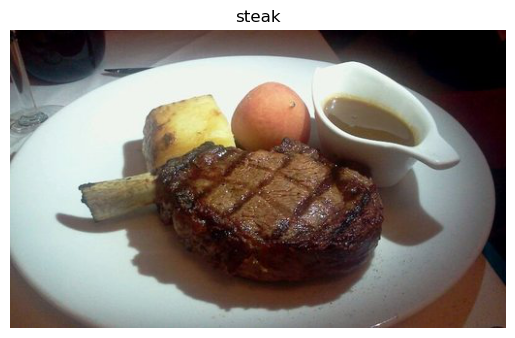

In [45]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [47]:
# View the img (actually just a big array/tensor)
img

array([[[ 84,  69,  62],
        [104,  89,  82],
        [ 96,  77,  71],
        ...,
        [ 44,   5,   6],
        [ 42,   6,   6],
        [ 40,   6,   5]],

       [[ 45,  32,  24],
        [ 69,  54,  47],
        [ 78,  60,  56],
        ...,
        [ 44,   4,   5],
        [ 44,   5,   6],
        [ 41,   5,   5]],

       [[ 17,   6,   0],
        [ 24,  11,   5],
        [ 35,  20,  17],
        ...,
        [ 44,   2,   3],
        [ 44,   4,   4],
        [ 42,   4,   3]],

       ...,

       [[ 93,  56,  37],
        [ 93,  58,  38],
        [ 92,  59,  40],
        ...,
        [ 96,  67,  59],
        [ 94,  66,  55],
        [ 93,  63,  53]],

       [[ 93,  56,  37],
        [ 93,  58,  38],
        [ 92,  59,  40],
        ...,
        [ 92,  63,  55],
        [ 94,  66,  55],
        [ 95,  65,  55]],

       [[ 93,  56,  37],
        [ 93,  58,  38],
        [ 92,  59,  40],
        ...,
        [ 79,  50,  42],
        [ 90,  62,  51],
        [ 96,  66,  56]]

In [49]:
# View the image shape
img.shape # returns (width, height, colour channels)

(308, 512, 3)

In [51]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.32941176, 0.27058824, 0.24313725],
        [0.40784314, 0.34901961, 0.32156863],
        [0.37647059, 0.30196078, 0.27843137],
        ...,
        [0.17254902, 0.01960784, 0.02352941],
        [0.16470588, 0.02352941, 0.02352941],
        [0.15686275, 0.02352941, 0.01960784]],

       [[0.17647059, 0.1254902 , 0.09411765],
        [0.27058824, 0.21176471, 0.18431373],
        [0.30588235, 0.23529412, 0.21960784],
        ...,
        [0.17254902, 0.01568627, 0.01960784],
        [0.17254902, 0.01960784, 0.02352941],
        [0.16078431, 0.01960784, 0.01960784]],

       [[0.06666667, 0.02352941, 0.        ],
        [0.09411765, 0.04313725, 0.01960784],
        [0.1372549 , 0.07843137, 0.06666667],
        ...,
        [0.17254902, 0.00784314, 0.01176471],
        [0.17254902, 0.01568627, 0.01568627],
        [0.16470588, 0.01568627, 0.01176471]],

       ...,

       [[0.36470588, 0.21960784, 0.14509804],
        [0.36470588, 0.22745098, 0.14901961],
        [0.36078431, 0

### A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

## An end-to-end example

We've checked out our data and found there's 750 training images, as well as 250 test images per class and they're all of various different shapes.

It's time to jump straight in the deep end.

Reading the original dataset authors paper, we see they used a Random Forest machine learning model and averaged 50.76% accuracy at predicting what different foods different images had in them.

From now on, that 50.76% will be our baseline.

The code in the following cell replicates and end-to-end way to model our pizza_steak dataset with a convolutional neural network (CNN) using the components listed above.

There will be a bunch of things you might not recognize but step through the code yourself and see if you can figure out what it's doing.

We'll go through each of the steps later on in the notebook.

For reference, the model we're using replicates TinyVGG, the computer vision architecture which fuels the CNN explainer webpage.

In [58]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
# Set the seed
tf.random.set_seed(42)

In [62]:
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [66]:
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [68]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [72]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 45s 845ms/step - accuracy: 0.6644 - loss: 0.5933 - val_accuracy: 0.7720 - val_loss: 0.4633
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 783ms/step - accuracy: 0.8178 - loss: 0.4186 - val_accuracy: 0.8440 - val_loss: 0.3980
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 36s 771ms/step - accuracy: 0.8602 - loss: 0.3467 - val_accuracy: 0.8500 - val_loss: 0.3941
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 753ms/step - accuracy: 0.8935 - loss: 0.2962 - val_accuracy: 0.8120 - val_loss: 0.4374
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 793ms/step - accuracy: 0.8913 - loss: 0.2555 - val_accuracy: 0.8500 - val_loss: 0.4113


Nice! After 5 epochs, our model beat the baseline score of 50.76% accuracy (our model got ~85% accuaracy on the training set and ~85% accuracy on the test set).

However, our model only went through a binary classificaiton problem rather than all of the 101 classes in the Food101 dataset, so we can't directly compare these metrics. That being said, the results so far show that our model is learning something.

### Since we've already fit a model, let's check out its architecture.

In [76]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Using the same model as before

We can use all of the same parameters in our previous model except for changing two things:

    The data - we're now working with images instead of dots.
    The input shape - we have to tell our neural network the shape of the images we're working with.
        A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.


In [82]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 466ms/step - accuracy: 0.5130 - loss: 2.1853 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 554ms/step - accuracy: 0.5100 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 433ms/step - accuracy: 0.4818 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 547ms/step - accuracy: 0.4924 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 432ms/step - accuracy: 0.5069 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932




Hmmm... our model ran but it doesn't seem like it learned anything. It only reaches 50% accuracy on the training and test sets which in a binary classification problem is as good as guessing.

Let's see the architecture.


In [85]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Since our previous model didn't work, do you have any ideas of how we might make it work?

How about we increase the number of layers?

And maybe even increase the number of neurons in each layer?

More specifically, we'll increase the number of neurons (also called hidden units) in each dense layer from 4 to 100 and add an extra layer.

In [88]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 33s 608ms/step - accuracy: 0.5642 - loss: 6.1609 - val_accuracy: 0.7620 - val_loss: 0.5528
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 611ms/step - accuracy: 0.7483 - loss: 0.6011 - val_accuracy: 0.6140 - val_loss: 1.0030
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 610ms/step - accuracy: 0.7012 - loss: 0.9771 - val_accuracy: 0.7700 - val_loss: 0.5273
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 558ms/step - accuracy: 0.8125 - loss: 0.4307 - val_accuracy: 0.7640 - val_loss: 0.5471
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 566ms/step - accuracy: 0.8017 - loss: 0.4444 - val_accuracy: 0.7820 - val_loss: 0.5610


In [90]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)